In [1]:
#!pip install biopython
#!pip install umap-learn

In [2]:
from Embedtest import OASDBDesc
import pandas as pd
#import umap.umap_ as umap
import seaborn as sns

In [3]:
#!ls ../Desktop/merck/

In [4]:
obj_oasdb = OASDBDesc()
df_seqs = obj_oasdb.read_data("../Desktop/merck/")

../Desktop/merck/1287165_1_Paired_All.csv.gz
../Desktop/merck/1287196_1_Paired_All.csv.gz
../Desktop/merck/SRR9179280_paired.csv.gz
../Desktop/merck/SRR9179297_paired.csv.gz
../Desktop/merck/1287197_1_Paired_All.csv.gz
../Desktop/merck/1287164_1_Paired_All.csv.gz
../Desktop/merck/SRR9179293_paired.csv.gz
../Desktop/merck/ERR4082275_paired.csv.gz
../Desktop/merck/SRR9179284_paired.csv.gz
../Desktop/merck/SRR10358523_paired.csv.gz
../Desktop/merck/SRR9179274_paired.csv.gz
../Desktop/merck/1287167_1_Paired_All.csv.gz


/Users/malavikha/EmbedTest/Embedtest.py:31: DtypeWarning: Columns (109,125,126,127,128,155,191) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(paired_file, compression = "gzip", sep = ",", skiprows=1)


../Desktop/merck/1287194_1_Paired_All.csv.gz
../Desktop/merck/1287195_1_Paired_All.csv.gz
../Desktop/merck/1287166_1_Paired_All.csv.gz
../Desktop/merck/ERR4082291_paired.csv.gz
../Desktop/merck/SRR9179277_paired.csv.gz
../Desktop/merck/1287179_1_Paired_All.csv.gz
../Desktop/merck/1287160_1_Paired_All.csv.gz
../Desktop/merck/1287193_1_Paired_All.csv.gz
../Desktop/merck/1287178_1_Paired_All.csv.gz
../Desktop/merck/SRR9179273_paired.csv.gz
../Desktop/merck/1287192_1_Paired_All.csv.gz
../Desktop/merck/1287161_1_Paired_All.csv.gz
../Desktop/merck/1287162_1_Paired_All.csv.gz
../Desktop/merck/1287191_1_Paired_All.csv.gz
../Desktop/merck/1287188_1_Paired_All.csv.gz
../Desktop/merck/SRR9179294_paired.csv.gz
../Desktop/merck/1279059_1_Paired_All.csv.gz
../Desktop/merck/SRR9179283_paired.csv.gz
../Desktop/merck/SRR10358524_paired.csv.gz
../Desktop/merck/1287190_1_Paired_All.csv.gz
../Desktop/merck/1287163_1_Paired_All.csv.gz
../Desktop/merck/SRR9179287_paired.csv.gz
../Desktop/merck/1279058_1_Pai

/Users/malavikha/EmbedTest/Embedtest.py:31: DtypeWarning: Columns (109,125,126,127,128,155,191) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(paired_file, compression = "gzip", sep = ",", skiprows=1)


../Desktop/merck/SRR11528762_paired.csv.gz
../Desktop/merck/1287207_1_Paired_All.csv.gz
../Desktop/merck/1287174_1_Paired_All.csv.gz
../Desktop/merck/1287187_1_Paired_All.csv.gz
../Desktop/merck/1287201_1_Paired_All.csv.gz
../Desktop/merck/1279049_1_Paired_All.csv.gz
../Desktop/merck/1287198_1_Paired_All.csv.gz
../Desktop/merck/1287181_1_Paired_All.csv.gz
../Desktop/merck/SRR12875362_1_Paired_All.csv.gz
../Desktop/merck/1287172_1_Paired_All.csv.gz
../Desktop/merck/1279050_1_Paired_All.csv.gz


/Users/malavikha/EmbedTest/Embedtest.py:31: DtypeWarning: Columns (109,125,126,127,128,155,191) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(paired_file, compression = "gzip", sep = ",", skiprows=1)


../Desktop/merck/1287199_1_Paired_All.csv.gz
../Desktop/merck/SRR11528761_paired.csv.gz
../Desktop/merck/1287200_1_Paired_All.csv.gz
../Desktop/merck/1279051_1_Paired_All.csv.gz
../Desktop/merck/1287173_1_Paired_All.csv.gz
../Desktop/merck/1287180_1_Paired_All.csv.gz
../Desktop/merck/SRR9179300_paired.csv.gz
../Desktop/merck/ERR4082251_paired.csv.gz
../Desktop/merck/1279052_1_Paired_All.csv.gz
../Desktop/merck/1287183_1_Paired_All.csv.gz
../Desktop/merck/1287170_1_Paired_All.csv.gz
../Desktop/merck/SRR12875360_1_Paired_All.csv.gz
../Desktop/merck/1287169_1_Paired_All.csv.gz
../Desktop/merck/1287203_1_Paired_All.csv.gz
../Desktop/merck/SRR9179299_paired.csv.gz
../Desktop/merck/1287171_1_Paired_All.csv.gz
../Desktop/merck/SRR12875361_1_Paired_All.csv.gz
../Desktop/merck/1287182_1_Paired_All.csv.gz
../Desktop/merck/1279053_1_Paired_All.csv.gz
../Desktop/merck/1287202_1_Paired_All.csv.gz
../Desktop/merck/1287168_1_Paired_All.csv.gz
../Desktop/merck/SRR12875351_1_Paired_All.csv.gz
../Deskto

In [5]:
df_seqs.shape

(1572406, 8)

In [6]:
df_vgene, df_heavy_len = obj_oasdb.perform_random_sample(df_seqs, 10, 500)

/Users/malavikha/EmbedTest/Embedtest.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["iter"]= i
/Users/malavikha/EmbedTest/Embedtest.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["iter"] = i
/Users/malavikha/EmbedTest/Embedtest.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [7]:
df_heavy_len

,VH_Len,iter
0,130,0
1,131,0
2,124,0
3,129,0
4,124,0
...,...,...
4995,116,9
4996,127,9
4997,121,9
4998,133,9


<AxesSubplot:xlabel='iter', ylabel='VH_Len'>

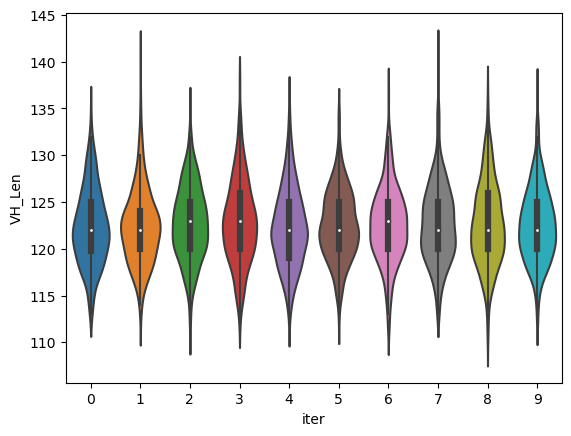

In [8]:
sns.violinplot(data=df_heavy_len, x='iter', y='VH_Len')

In [9]:
df_vgene[["v_call_heavy", "iter"]].value_counts().unstack().fillna(0.0).sort_values(0, ascending=False)

iter,0,1,2,3,4,5,6,7,8,9
v_call_heavy,,,,,,,,,,
IGHV3-23*01,38.0,44.0,40.0,36.0,31.0,47.0,51.0,33.0,46.0,38.0
IGHV4-39*01,36.0,27.0,29.0,22.0,25.0,28.0,29.0,24.0,18.0,27.0
IGHV4-59*01,20.0,15.0,23.0,19.0,17.0,23.0,15.0,25.0,14.0,18.0
IGHV3-30*18,18.0,6.0,15.0,11.0,10.0,16.0,4.0,10.0,11.0,9.0
IGHV4-34*01,18.0,19.0,18.0,21.0,15.0,17.0,15.0,21.0,25.0,20.0
...,...,...,...,...,...,...,...,...,...,...
IGHV2-70*20,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
IGHV2-72*01,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IGHV2-9-1*01,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
df_sub_sample = df_seqs.sample(1500)

#annotating with v_call heavy
annot_col = 'v_call_heavy'
seq_name='sequence_alignment_aa_heavy'
df_sub_sample.reset_index(inplace=True)

df_pc_en = obj_oasdb.pc_embedding(df_sub_sample[[seq_name, annot_col]], seq_name, annot_col)
df_pcs_meta = obj_oasdb.pca_analysis(df_pc_en, df_sub_sample[[annot_col]], annot_col)

In [12]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'PC2')

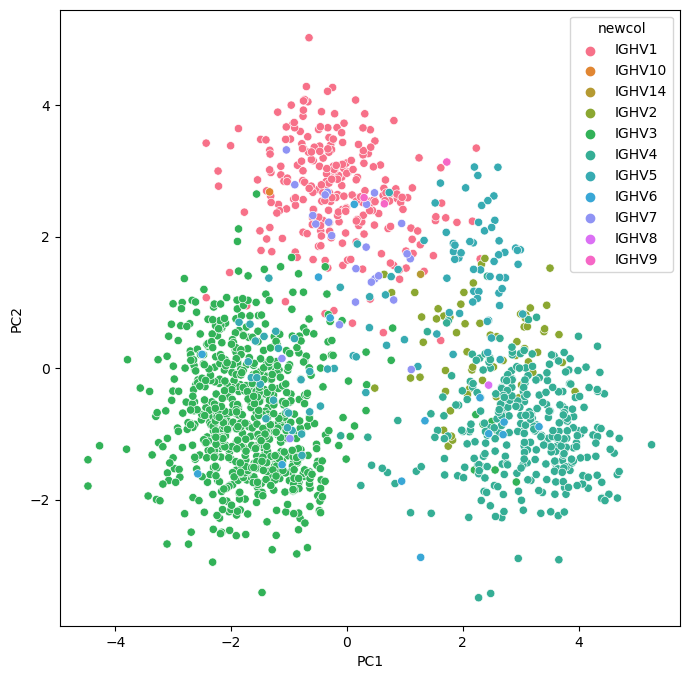

In [14]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df_pcs_meta, x="PC1", y='PC2', cmap ='plasma', hue='newcol')

plt.xlabel('PC1')
plt.ylabel('PC2')

v_call_light

In [15]:
df_sub_sample = df_seqs.sample(1500)

#annotating with v_call light
annot_col = 'v_call_light'
seq_name='sequence_alignment_aa_light'
df_sub_sample.reset_index(inplace=True)

df_pc_en = obj_oasdb.pc_embedding(df_sub_sample[[seq_name, annot_col]], seq_name, annot_col)
df_pcs_meta = obj_oasdb.pca_analysis(df_pc_en, df_sub_sample[[annot_col]], annot_col)

Text(0, 0.5, 'PC2')

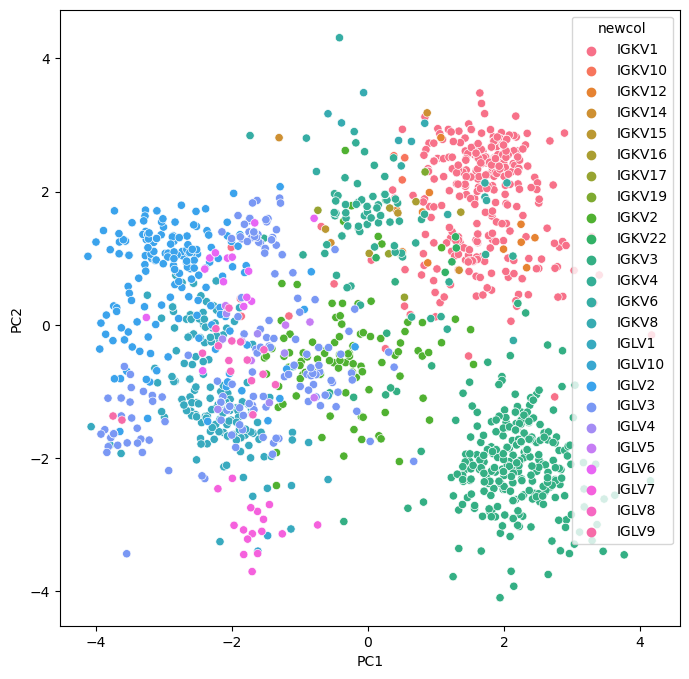

In [16]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df_pcs_meta, x="PC1", y='PC2', cmap ='plasma', hue='newcol')

plt.xlabel('PC1')
plt.ylabel('PC2')

j_call_heavy

In [17]:
df_sub_sample = df_seqs.sample(1500)

#annotating with j_call heavy
annot_col = 'j_call_heavy'
seq_name='sequence_alignment_aa_heavy'
df_sub_sample.reset_index(inplace=True)

df_pc_en = obj_oasdb.pc_embedding(df_sub_sample[[seq_name, annot_col]], seq_name, annot_col)
df_pcs_meta = obj_oasdb.pca_analysis(df_pc_en, df_sub_sample[[annot_col]], annot_col)

Text(0, 0.5, 'PC2')

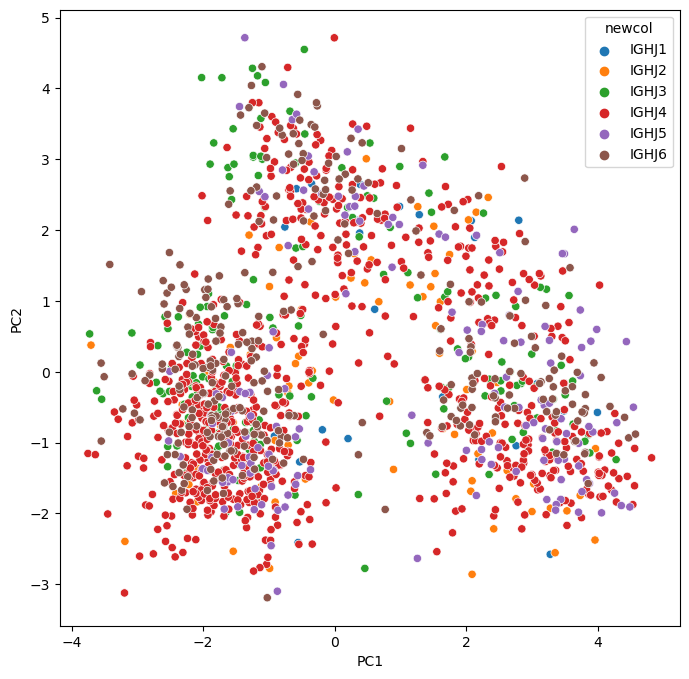

In [18]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df_pcs_meta, x="PC1", y='PC2', cmap ='plasma', hue='newcol')

plt.xlabel('PC1')
plt.ylabel('PC2')

j_call_light

In [19]:
df_sub_sample = df_seqs.sample(1500)

#annotating with j_call light
annot_col = 'j_call_light'
seq_name='sequence_alignment_aa_light'
df_sub_sample.reset_index(inplace=True)

df_pc_en = obj_oasdb.pc_embedding(df_sub_sample[[seq_name, annot_col]], seq_name, annot_col)
df_pcs_meta = obj_oasdb.pca_analysis(df_pc_en, df_sub_sample[[annot_col]], annot_col)

Text(0, 0.5, 'PC2')

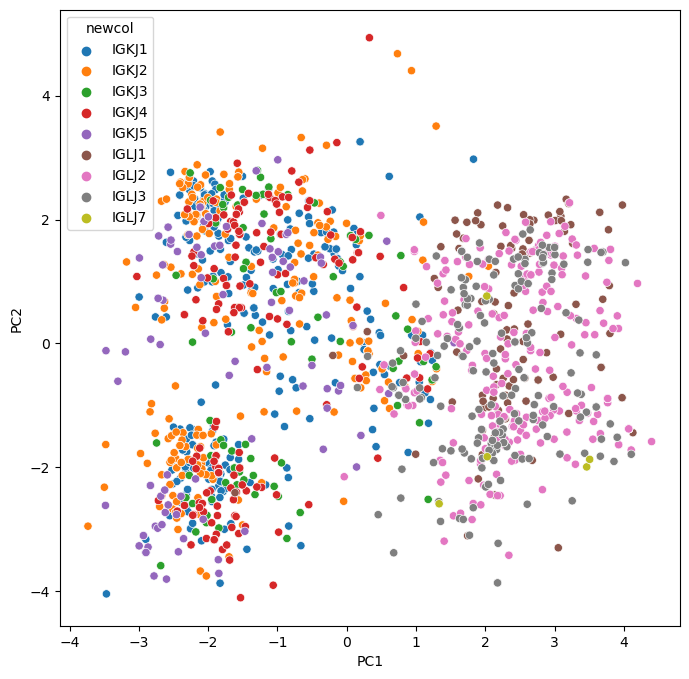

In [20]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df_pcs_meta, x="PC1", y='PC2', cmap ='plasma', hue='newcol')

plt.xlabel('PC1')
plt.ylabel('PC2')

In [21]:
 #please try a sequence embedding with ablang embedding, perform dimensionality reduction, and annotate it with different genes?

In [28]:
#try with 10,000, 50,000 sequences if savio allows

**Ablang Embedding**

In [29]:
import ablang as ablang

In [30]:
obj_oasdb.ablang_encode_seq(df_seqs, 'v_call_light')

NameError: name 'ablang' is not defined